In [2]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [ ]:
def load_and_join(day):
    prices = pl.read_csv(
        f"round-4-island-data-bottle/prices_round_4_day_{day}.csv", separator=";"
    )
    prices = prices.pivot(
        index="timestamp",
        on="product",
        values="mid_price",
    )
    conversions = pl.read_csv(
        f"round-4-island-data-bottle/observations_round_4_day_{day}.csv"
    )
    combined = prices.join(conversions, on="timestamp", how="inner")
    combined = combined.with_columns(
        pl.col("timestamp").add((day - 1) * int(1e6)).alias("time")
    )
    return combined


day_1 = load_and_join(1)
day_2 = load_and_join(2).select(day_1.columns)
day_3 = load_and_join(3).select(day_1.columns)
df = pl.concat([day_1, day_2, day_3], how="vertical").drop("timestamp")
df.describe()

statistic,VOLCANIC_ROCK,PICNIC_BASKET1,PICNIC_BASKET2,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,CROISSANTS,MAGNIFICENT_MACARONS,VOLCANIC_ROCK_VOUCHER_10250,SQUID_INK,VOLCANIC_ROCK_VOUCHER_10500,RAINFOREST_RESIN,KELP,JAMS,VOLCANIC_ROCK_VOUCHER_10000,DJEMBES,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,time
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",10210.920383,58450.475333,30117.485817,711.31435,463.767617,4260.274417,663.6359,79.910733,1852.753617,17.404083,10000.006717,2044.14935,6509.741767,236.2162,13348.8109,662.880117,664.394933,1.577587,10.1648,-3.677783,202.201901,55.167418,1.49995e6
"""std""",154.265012,201.770936,78.079237,154.049952,151.233739,15.808144,74.554241,76.043725,47.238399,23.720984,2.181606,7.693742,21.28514,129.315222,48.045335,74.544616,74.545667,0.374981,0.686979,1.111055,6.707842,10.327112,866039.837421
"""min""",9856.5,58038.0,29926.5,359.5,133.5,4226.5,523.5,1.5,1734.5,0.0,9994.5,2029.5,6438.0,18.5,13242.5,522.5,524.0,1.0,9.0,-6.0,191.684683,20.0,0.0
"""25%""",10132.5,58290.5,30066.0,633.0,385.5,4249.5,610.5,29.5,1813.5,3.0,10000.0,2037.0,6499.0,158.5,13302.0,610.0,611.5,1.1,9.5,-4.0,197.130706,47.21,750000.0
"""50%""",10196.5,58416.5,30102.5,696.5,447.5,4261.0,653.5,49.5,1851.5,5.5,10000.0,2045.0,6515.5,210.5,13352.0,653.0,654.5,1.7,10.0,-3.5,199.932414,55.0,1.5e6
"""75%""",10301.5,58601.0,30175.0,801.5,551.5,4272.5,698.5,108.5,1887.0,19.5,10000.0,2049.5,6523.5,308.5,13382.0,697.5,699.0,1.9,10.5,-3.0,205.817012,64.19,2.2499e6
"""max""",10519.5,58984.5,30316.5,1019.5,770.5,4314.5,940.5,282.5,1987.0,97.5,10005.5,2065.5,6554.0,521.5,13498.5,939.0,940.5,2.1,11.5,-2.0,220.14033,70.0,2.9999e6


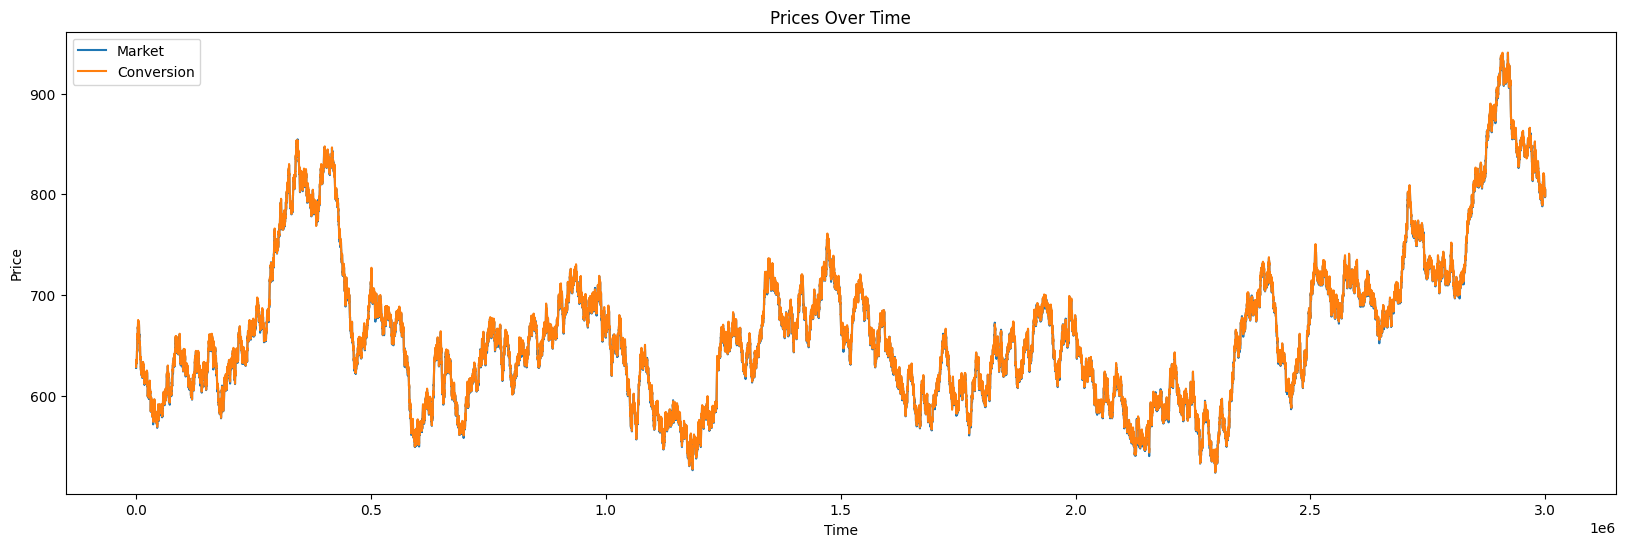

In [4]:
plt.figure(figsize=(20, 6))
plt.plot(df["time"], df["MAGNIFICENT_MACARONS"], label="Market")
plt.plot(df["time"], df["askPrice"], label="Conversion")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Prices Over Time")
plt.legend()
plt.show()

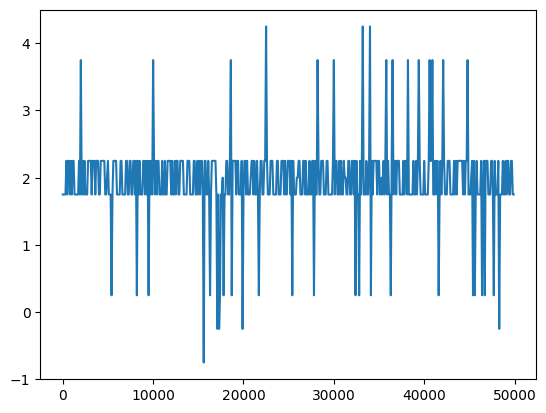

In [5]:
t = 500
plt.plot(
    df["time"][:t],
    df["MAGNIFICENT_MACARONS"][:t]
    - (df["bidPrice"][:t] + df["askPrice"][:t]) / 2
    - df["transportFees"][:t]
    - df["importTariff"][:t],
    label="Market",
)

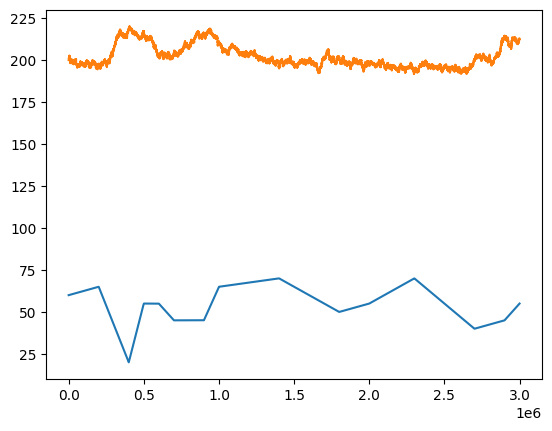

In [6]:
plt.plot(df["time"], df["sunlightIndex"])
plt.plot(df["time"], df["sugarPrice"])

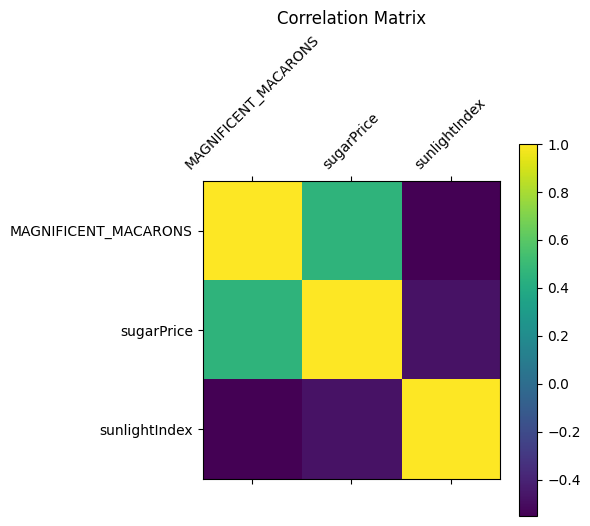

In [7]:
# corrrelation matrix
corr = df.select(["MAGNIFICENT_MACARONS", "sugarPrice", "sunlightIndex"]).corr()
# plot the correlation matrix with values
plt.matshow(corr, cmap="viridis", fignum=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")

plt.colorbar()

--- Fold 1/3 ---
  Coefficients: [ -3.82054767   6.81956697 103.74750122 -45.66729146 -46.48080281]
  Intercept: -378.68031715804125
  Validation R^2 score: 0.4967


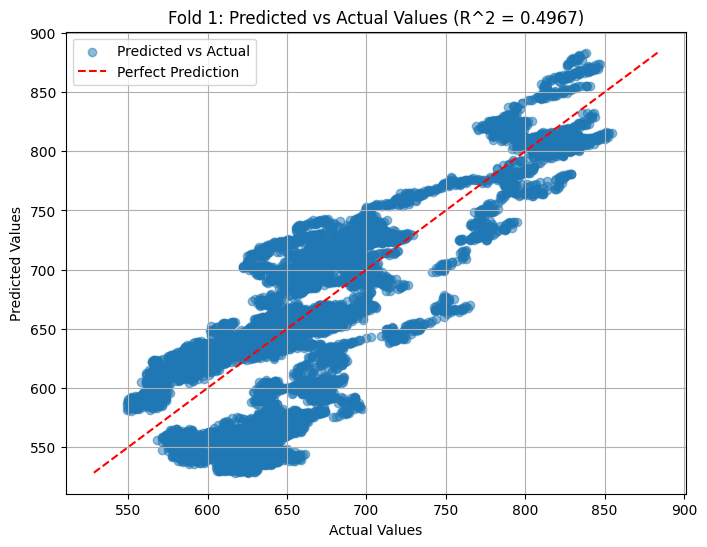

--- Fold 2/3 ---
  Coefficients: [ -2.09162801   6.24166837  31.99386454 -60.99621395 -64.70470322]
  Intercept: -159.38772574407108
  Validation R^2 score: -0.9284


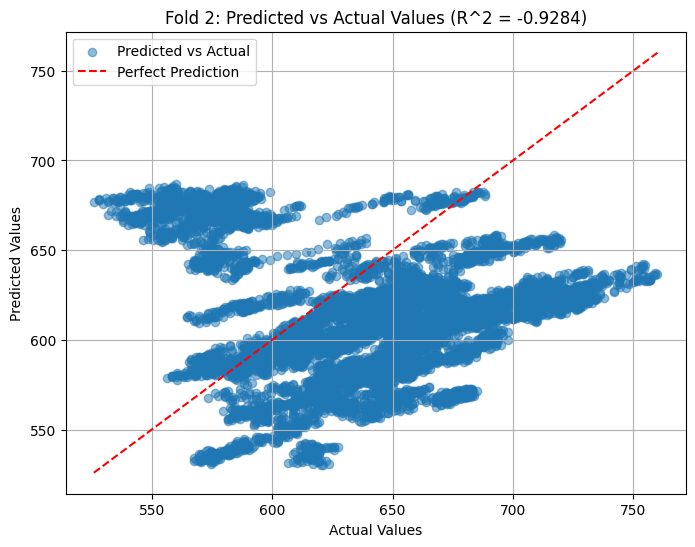

--- Fold 3/3 ---
  Coefficients: [ -2.61609953   5.85758995  40.79929256 -65.11039904  -6.75773732]
  Intercept: 164.8223272408419
  Validation R^2 score: -0.6156


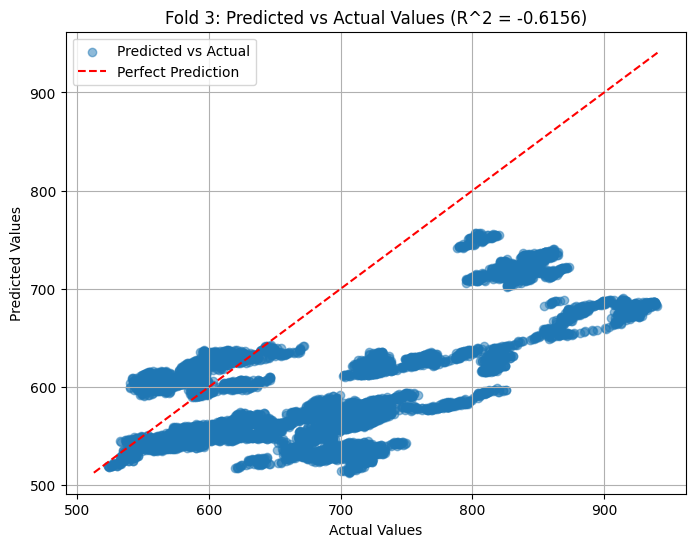


--- Cross-Validation Summary ---
Mean R^2 score across 3 folds: -0.3491
Standard deviation of R^2 scores: 0.6116


In [8]:
# linear regression with 5-fold cross-validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Select feature columns and target column
X = df.select(
    [
        "sunlightIndex",
        "sugarPrice",
        "transportFees",
        "exportTariff",
        "importTariff",
    ]
).to_numpy()
y = df["MAGNIFICENT_MACARONS"].to_numpy()

# Initialize KFold
n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=False)

fold_r2_scores = []

# Perform cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"--- Fold {fold + 1}/{n_splits} ---")

    # Split data for the current fold
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Fit the model on training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    predictions_val = model.predict(X_val)

    # Calculate R^2 score for the validation set
    r2_val = r2_score(y_val, predictions_val)
    fold_r2_scores.append(r2_val)

    # Print coefficients and intercept for the fold
    print(f"  Coefficients: {model.coef_}")
    print(f"  Intercept: {model.intercept_}")
    print(f"  Validation R^2 score: {r2_val:.4f}")

    # Plot predicted vs actual for the validation set
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val, predictions_val, alpha=0.5, label="Predicted vs Actual")
    # Add a line for perfect predictions
    min_val = min(np.min(y_val), np.min(predictions_val))
    max_val = max(np.max(y_val), np.max(predictions_val))
    plt.plot([min_val, max_val], [min_val, max_val], "r--", label="Perfect Prediction")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Fold {fold + 1}: Predicted vs Actual Values (R^2 = {r2_val:.4f})")
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n--- Cross-Validation Summary ---")
print(f"Mean R^2 score across {n_splits} folds: {np.mean(fold_r2_scores):.4f}")
print(f"Standard deviation of R^2 scores: {np.std(fold_r2_scores):.4f}")

# Note: The original plots and print statements below this block are removed
# as they relied on a single train/test split and a single model.
# The plotting is now done per fold above.

In [9]:
# plot test residuals
plt.plot(df["MAGNIFICENT_MACARONS"].to_numpy() - predictions)

NameError: name 'predictions' is not defined

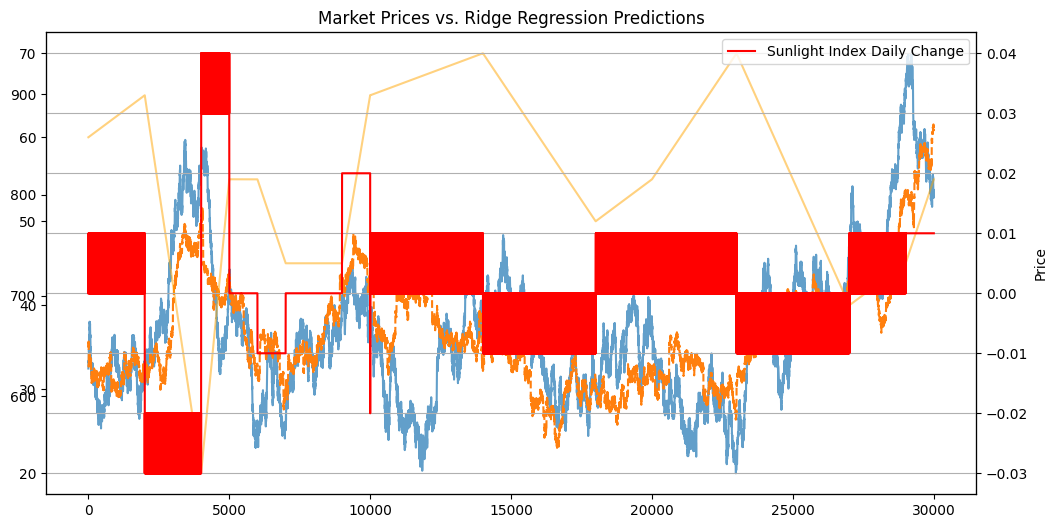

array([  6.5060752 ,  32.12681382, -47.20448061, -55.19232532])
np.float64(-425.7490194870545)


In [19]:
from sklearn.linear_model import Ridge  # Import Ridge regression

# Select features and target
X = df.select(
    [
        "sugarPrice",
        "transportFees",
        "exportTariff",
        "importTariff",
    ]
).to_numpy()
y = df["MAGNIFICENT_MACARONS"].to_numpy()

# Instantiate and fit the Ridge model
# alpha controls the regularization strength; higher alpha means stronger regularization
model = Ridge(alpha=1.0)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))  # Added figure size for better visibility
plt.plot(y, label="Market (Actual)", alpha=0.7)
plt.plot(predictions, label="Predictions (Ridge)", linestyle="--")
# plot sunlight index on separate axis
plt.twinx().plot(df["sunlightIndex"], label="Sunlight Index", color="orange", alpha=0.5)
# plot sunlight index daily change
plt.twinx().plot(
    df["sunlightIndex"].diff(),
    label="Sunlight Index Daily Change",
    color="red",
)

plt.title("Market Prices vs. Ridge Regression Predictions")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients of the Ridge model and corresponding feature names
print(model.coef_.__repr__())
print(model.intercept_.__repr__())

Text(0.5, 1.0, 'Residuals of Ridge Regression')

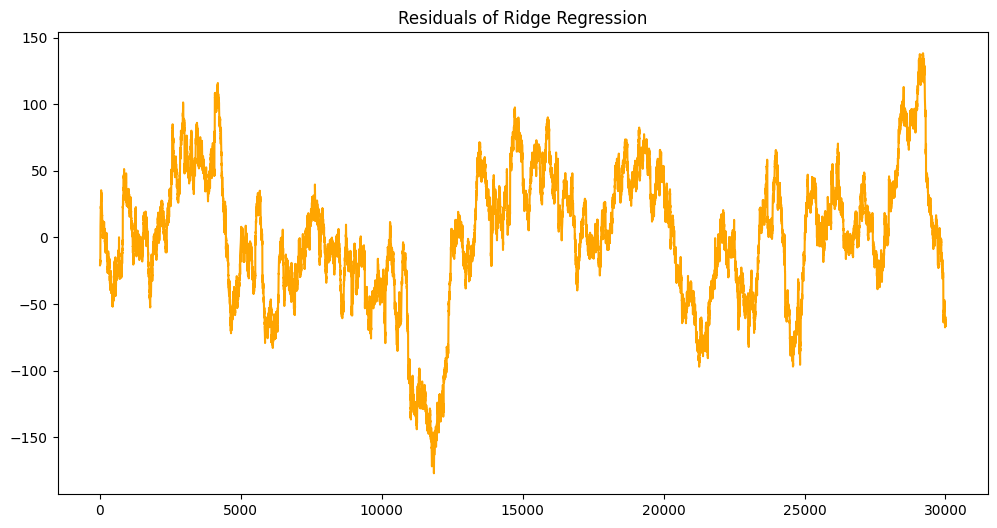

In [13]:
# plot the residuals
plt.figure(figsize=(12, 6))  # Added figure size for better visibility
plt.plot(y - predictions, label="Residuals", color="orange")
plt.title("Residuals of Ridge Regression")

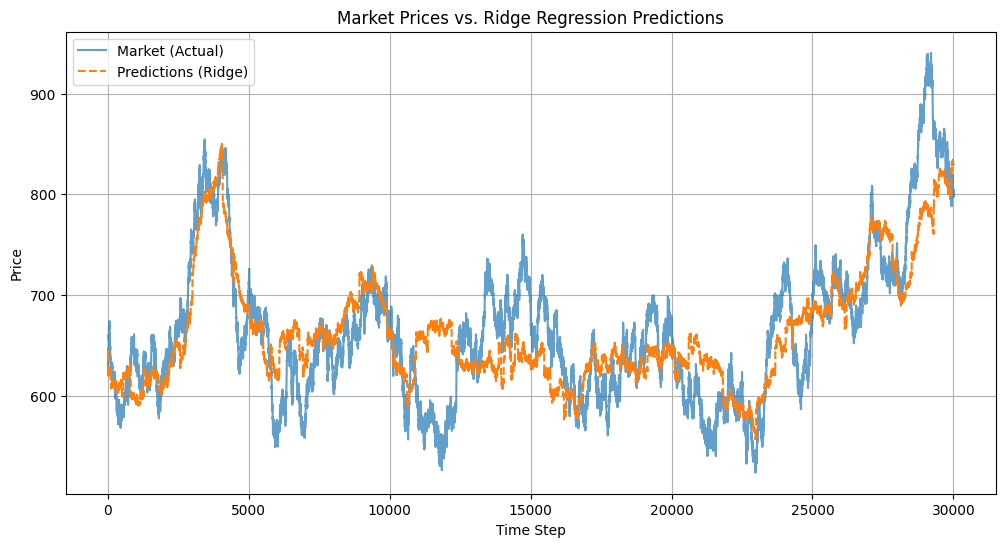

array([ -2.98940652,   4.56671008,  42.74552234, -48.85956228,
       -45.30785312])
np.float64(167.73672301293078)


In [ ]:
# Select features and target
X = df.select(
    [
        "sunlightIndex",
        "sugarPrice",
        "transportFees",
        "exportTariff",
        "importTariff",
    ]
).to_numpy()
y = df["MAGNIFICENT_MACARONS"].to_numpy()

# Instantiate and fit the Ridge model
# alpha controls the regularization strength; higher alpha means stronger regularization
model = Ridge(alpha=1000)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))  # Added figure size for better visibility
plt.plot(y, label="Market (Actual)", alpha=0.7)
plt.plot(predictions, label="Predictions (Ridge)", linestyle="--")
plt.title("Market Prices vs. Ridge Regression Predictions")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients of the Ridge model and corresponding feature names
print(model.coef_.__repr__())
print(model.intercept_.__repr__())

Shape of X (with lags): (29998, 11)
Shape of y_change: (29998,)
Train shapes: X=(23998, 11), y=(23998,)
Test shapes: X=(6000, 11), y=(6000,)

--- Model Evaluation (Predicting Price Change with Lags) ---
Mean Absolute Error (MAE): 2.0556
Root Mean Squared Error (RMSE): 2.5784
R-squared (R2): -0.0006
Directional Accuracy (on non-zero changes): 0.4960


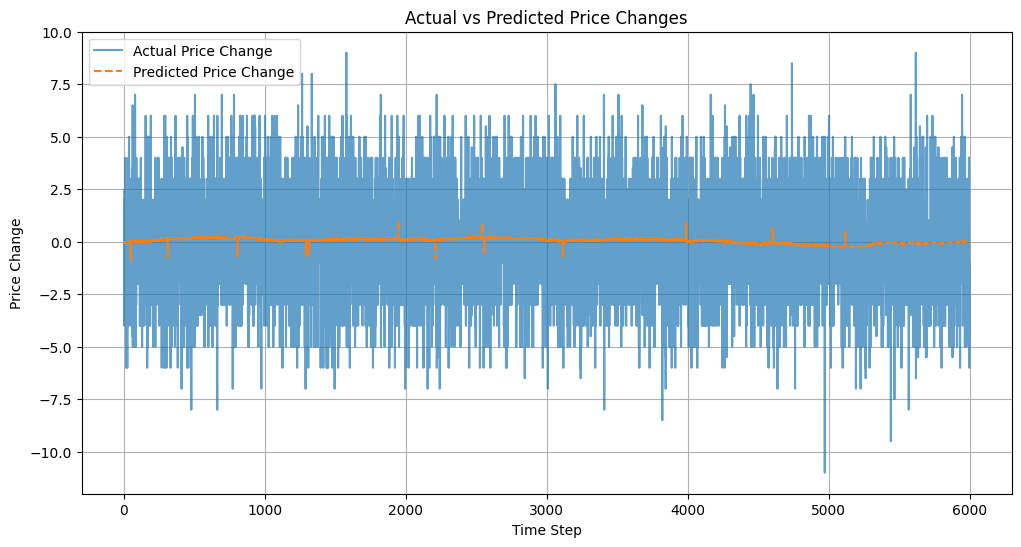

In [10]:
import polars as pl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    root_mean_squared_error,
)

# Assume 'df' is your Polars DataFrame loaded with the data in chronological order
# Example: Make sure it's sorted if you have a date column
# df = pl.read_csv('your_macaron_data.csv', try_parse_dates=True).sort('date_column')

# --- 1. Create Lag Features using Polars ---

# Define original features and the target price column
original_feature_cols = [
    "sunlightIndex",
    "sugarPrice",
    "transportFees",
    "exportTariff",
    "importTariff",
]
price_col = "MAGNIFICENT_MACARONS"

# Create expressions for lag(1) features
lag_cols_expr = [
    pl.col(col).shift(1).alias(f"{col}_lag1")
    for col in original_feature_cols + [price_col]
]

# Add lagged features to the DataFrame
df_with_lags = df.with_columns(lag_cols_expr)

# Drop rows with null values created by the shift operation
df_with_lags = df_with_lags.drop_nulls()

# --- 2. Define Features (X) including lags ---

# List of all feature columns to use (original + lagged)
# We use the lagged features (known at time t-1) and current original features
# (known at time t) to predict the change from t to t+1.
feature_cols_with_lags = original_feature_cols + [
    f"{col}_lag1" for col in original_feature_cols + [price_col]
]

# Select the features from the dataframe with lags
X_full = df_with_lags.select(feature_cols_with_lags).to_numpy()

# --- 3. Define Target (y) - Price Change ---
# Get the price column *after* creating lags and dropping nulls
price_y_lagged = df_with_lags[price_col].to_numpy()

# Calculate the difference between consecutive prices
# y_change[i] will be price_y_lagged[i+1] - price_y_lagged[i]
y_change = np.diff(price_y_lagged)

# --- 4. Align Features and Target ---
# np.diff reduces the length by 1. We need the features from the start
# of the period over which the change occurs.
# y_change[i] uses information up to time i+1 (specifically price[i+1])
# We want to predict this using features known up to time i.
# Therefore, we use the first N-1 rows of X_full, where N is the length of price_y_lagged.
X = X_full[:-1, :]

# Ensure X and y_change have compatible shapes for training
print(f"Shape of X (with lags): {X.shape}")
print(f"Shape of y_change: {y_change.shape}")
# The number of samples (rows) in X should match the length of y_change
if X.shape[0] != y_change.shape[0]:
    raise ValueError(
        "X and y_change dimensions do not match after lagging and diffing!"
    )

# --- 5. Time Series Split ---
# IMPORTANT: Split data chronologically, don't shuffle!
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y_change[:split_index], y_change[split_index:]

print(f"Train shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Test shapes: X={X_test.shape}, y={y_test.shape}")

# --- 6. Train Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# Inspect the coefficients if desired
# print("\nFeature Names:", feature_cols_with_lags)
# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)

# --- 7. Predict and Evaluate ---
y_pred = model.predict(X_test)

# Evaluate the model's performance on predicting the price *change*
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)  # RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

print("\n--- Model Evaluation (Predicting Price Change with Lags) ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# --- Optional: Compare prediction direction accuracy ---
actual_direction = np.sign(y_test)
predicted_direction = np.sign(y_pred)
non_zero_mask = actual_direction != 0
# Handle case where all changes are zero in test set
if np.any(non_zero_mask):
    direction_accuracy = np.mean(
        actual_direction[non_zero_mask] == predicted_direction[non_zero_mask]
    )
    print(f"Directional Accuracy (on non-zero changes): {direction_accuracy:.4f}")
else:
    print("Directional Accuracy: No non-zero changes in test set to evaluate.")

# --- Optional: Plot Actual vs Predicted Price Changes ---
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Price Change", alpha=0.7)
plt.plot(y_pred, label="Predicted Price Change", linestyle="--")
plt.title("Actual vs Predicted Price Changes")
plt.xlabel("Time Step")
plt.ylabel("Price Change")
plt.legend()
plt.grid(True)
plt.show()
